In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C://Users//shaik//OneDrive//Desktop//BEPEC//default_of_credit_card_clients_0 (1).xlsx")

In [3]:
# Checking first 5 rows 
print(df.head(5)) 

# checking duplicate values
print(df.duplicated().sum())  # shows no duplicate values 

# checking missing values
print(df.isnull().sum())  # no missing values

# Using df.info() to inspect column names, non-null counts, data types, and overall shape
print(df.info())  # All columns are of type int64 and have no missing values 

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2      0      0   
1   2     120000    2          2         2   26      0      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [4]:
#Created a working copy d2 of the dataset to preserve the original df
d2 = df.copy()

In [5]:
#“The EDUCATION column contained unexpected values (0, 5, 6) not aligned with documentation. 
#These were recoded to ‘Others’ (4) to preserve data integrity and reduce noise.”

d2['EDUCATION'] = d2['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

In [6]:
# Validation after recoding
print("Unique values in EDUCATION after recoding:", d2['EDUCATION'].unique())
print("Value counts:\n", d2['EDUCATION'].value_counts().sort_index())

# vs 

# for comparision with original dataset
print("Unique values in EDUCATION after recoding:", df['EDUCATION'].unique())
print("Value counts:\n", df['EDUCATION'].value_counts().sort_index())

Unique values in EDUCATION after recoding: [2 1 3 4]
Value counts:
 EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64
Unique values in EDUCATION after recoding: [2 1 3 5 4 6 0]
Value counts:
 EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64


In [7]:
# Cleaning MARRIAGE column
# The original 'MARRIAGE' column contained undocumented value 0.
# Reassigned 0 → 3 ('Others')

d2['MARRIAGE'] = d2['MARRIAGE'].replace({0: 3})

In [8]:
# Validation after recoding
print("Unique values in MARRIAGE after recoding:", d2['MARRIAGE'].unique())
print("Value counts:\n", d2['MARRIAGE'].value_counts().sort_index())

# for comparision with original dataset
df['MARRIAGE'].value_counts().sort_index()

Unique values in MARRIAGE after recoding: [1 2 3]
Value counts:
 MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64


MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [9]:
# Repayment status columns (PAY_0 to PAY_6) validated
# All columns contain values in the expected range (0–8), representing delay severity.
# No undocumented or negative values found. Columns are ready for modeling.

for col in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    print(f"{col} unique values:", df[col].unique())

PAY_0 unique values: [2 0 1 3 4 8 7 5 6]
PAY_2 unique values: [2 0 3 5 7 4 1 6 8]
PAY_3 unique values: [0 2 3 4 6 7 1 5 8]
PAY_4 unique values: [0 2 3 4 5 7 6 1 8]
PAY_5 unique values: [0 2 3 5 4 7 8 6]
PAY_6 unique values: [0 2 3 6 4 7 8 5]


In [10]:
#  Validated financial columns for negative values
# - Found ~600 negative entries in BILL_AMT1–6, possibly due to refunds or data errors.
# - All PAY_AMT1–6 columns are clean (no negative values).
# - Negative bill amounts flagged for further review before modeling.


bill_cols = [f'BILL_AMT{i}' for i in range(1,7)]
pay_cols = [f'PAY_AMT{i}' for i in range(1,7)]

print("Negative bill amounts:")
print(df[bill_cols].lt(0).sum())

print("Negative payment amounts:")
print(df[pay_cols].lt(0).sum())

Negative bill amounts:
BILL_AMT1    590
BILL_AMT2    669
BILL_AMT3    655
BILL_AMT4    675
BILL_AMT5    655
BILL_AMT6    688
dtype: int64
Negative payment amounts:
PAY_AMT1    0
PAY_AMT2    0
PAY_AMT3    0
PAY_AMT4    0
PAY_AMT5    0
PAY_AMT6    0
dtype: int64


In [11]:
print("Target value counts:\n", df['default payment next month'].value_counts())

Target value counts:
 default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [12]:
print("Target value counts:\n", d2['default payment next month'].value_counts())

Target value counts:
 default payment next month
0    23364
1     6636
Name: count, dtype: int64


Initial Integrity Checks
- No missing values across all 25 columns.
- No duplicate rows — each customer record is unique.
- All columns are numeric (int64), meaning no hidden formatting issues like whitespace.
Column-Specific Cleaning
EDUCATION
- Found undocumented values: 0, 5, 6
- Reassigned all to 4 = "Others" to align with the data dictionary and reduce ambiguity
 MARRIAGE
- Found undocumented value: 0
- Reassigned 0 → 3 = "Others" to preserve consistency
Repayment Status (PAY_0 to PAY_6)
- All values fall within expected range 0–8, representing delay severity
- No negative or undocumented values
- Columns are clean and ready for modeling

Repayment Status (PAY_0 to PAY_6)
- All values fall within expected range 0–8, representing delay severity
- No negative or undocumented values
- Columns are clean and ready for modeling
 Target Variable
- default payment next month is binary:
- 0 = No default
- 1 = Default
- Distribution confirmed and ready for analysis

In [13]:
d2.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.842267      1.557267   
std     8660.398374   129747.661567      0.489129      0.744494      0.521405   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500      0.356767      0.320033      0.304067      0.258767   
std        9.217904      0.760594      0.801727      0.790589      0.761113   
min       21.000000      0.000000      0.000000      0.000000      0.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

Visualization 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

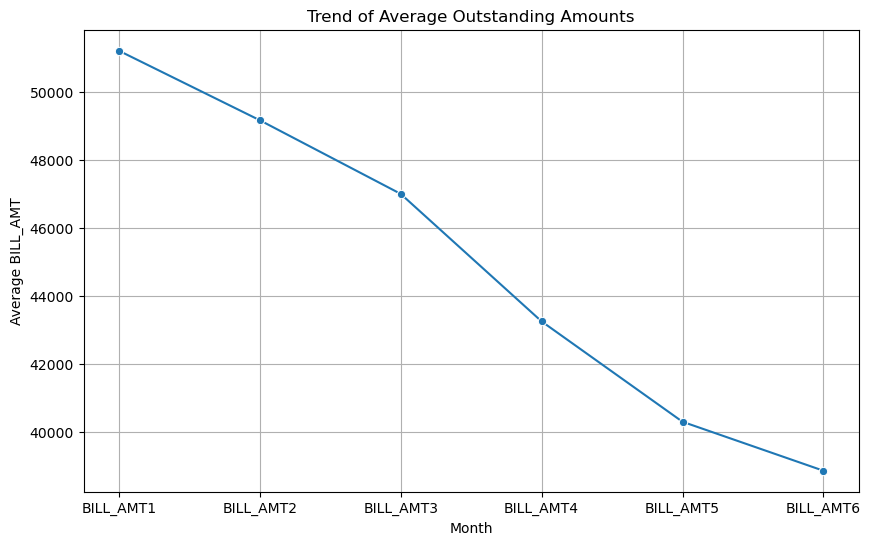

In [15]:
# Average outstanding amounts across months
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
avg_bills = d2[bill_cols].mean()

# Line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=bill_cols, y=avg_bills.values, marker='o')
plt.title("Trend of Average Outstanding Amounts")
plt.xlabel("Month")
plt.ylabel("Average BILL_AMT")
plt.grid(True)
plt.show()


In [16]:
import plotly.express as px

avg_bills = d2[bill_cols].mean()

fig = px.line(x=bill_cols, y=avg_bills.values, markers=True,
              labels={'x': 'Month', 'y': 'Average BILL_AMT'},
              title='Trend of Average Outstanding Amounts')
fig.show()


In [17]:
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
d2['TOTAL_BILL_AMT'] = d2[bill_cols].sum(axis=1)

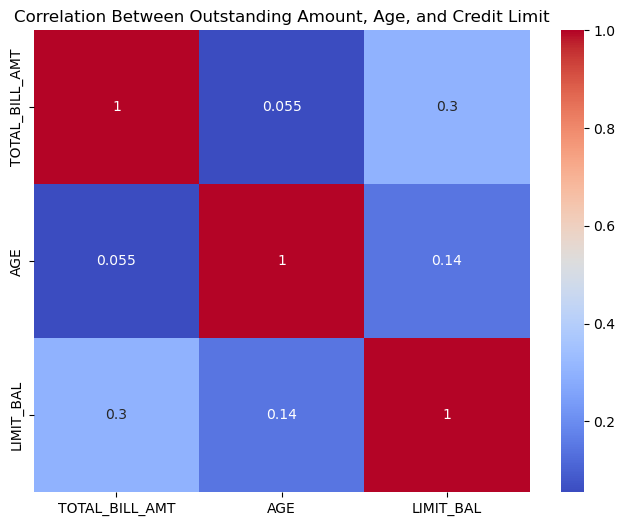

In [18]:
corr_vars = ['TOTAL_BILL_AMT', 'AGE', 'LIMIT_BAL']
plt.figure(figsize=(8, 6))
sns.heatmap(d2[corr_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Outstanding Amount, Age, and Credit Limit")
plt.show()


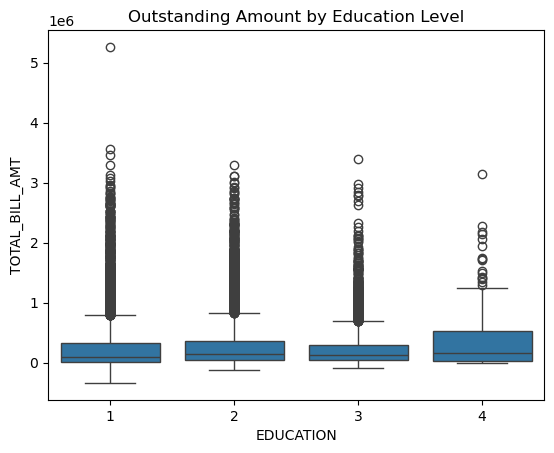

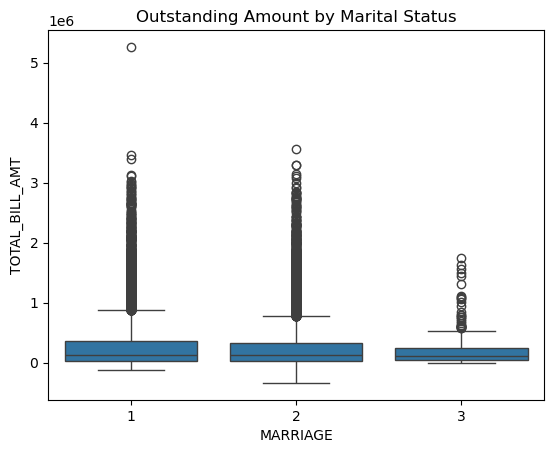

In [19]:
# EDUCATION
sns.boxplot(x='EDUCATION', y='TOTAL_BILL_AMT', data=d2)
plt.title("Outstanding Amount by Education Level")
plt.show()

# MARRIAGE
sns.boxplot(x='MARRIAGE', y='TOTAL_BILL_AMT', data=d2)
plt.title("Outstanding Amount by Marital Status")
plt.show()


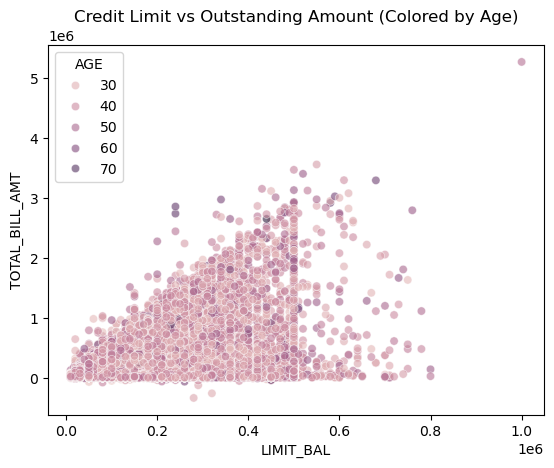

In [20]:
sns.scatterplot(data=d2, x='LIMIT_BAL', y='TOTAL_BILL_AMT', hue='AGE', alpha=0.6)
plt.title("Credit Limit vs Outstanding Amount (Colored by Age)")
plt.show()


In [21]:
import plotly.express as px

fig = px.scatter(d2, x='LIMIT_BAL', y='TOTAL_BILL_AMT',
                 color='EDUCATION', size='AGE',
                 hover_data=['MARRIAGE'],
                 title='Outstanding Amount vs Credit Limit (Segmented by Education & Age)')
fig.show()


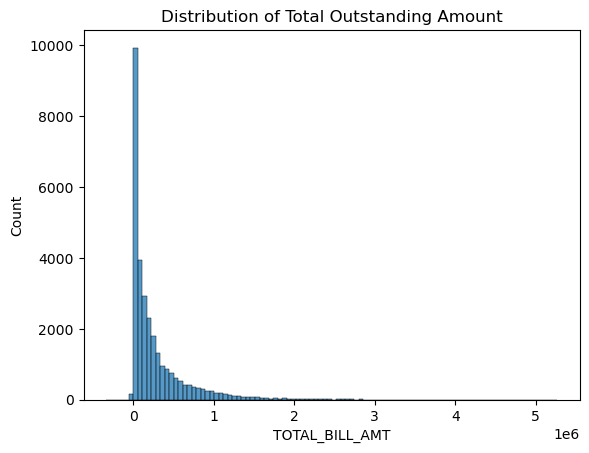

In [22]:
sns.histplot(d2['TOTAL_BILL_AMT'], bins=100)
plt.title("Distribution of Total Outstanding Amount")
plt.show()


In [23]:
Q1 = d2['TOTAL_BILL_AMT'].quantile(0.25)
Q3 = d2['TOTAL_BILL_AMT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = d2[(d2['TOTAL_BILL_AMT'] < lower_bound) | (d2['TOTAL_BILL_AMT'] > upper_bound)]
print(f"Outliers count: {len(outliers)}")

Outliers count: 2575


In [24]:
# Create cleaned version as d3
d3 = d2[(d2['TOTAL_BILL_AMT'] >= lower_bound) & (d2['TOTAL_BILL_AMT'] <= upper_bound)]

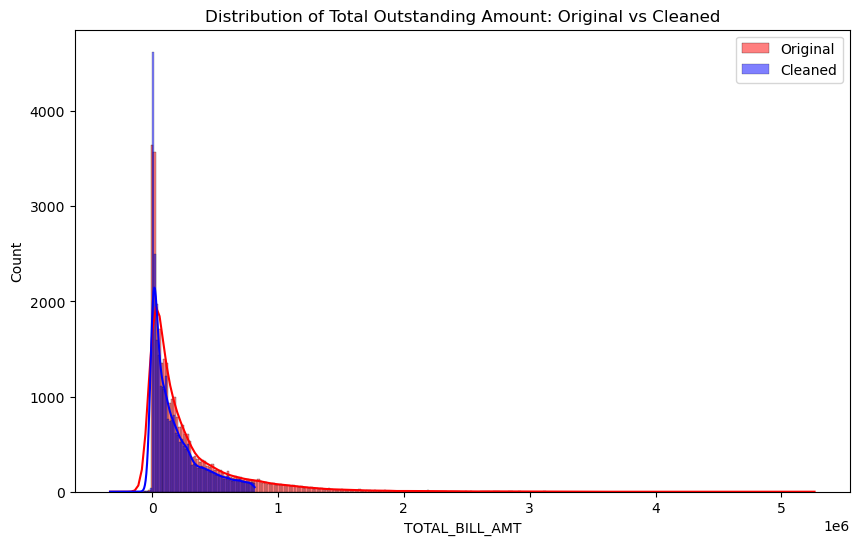

In [25]:
# Histogram comparison
plt.figure(figsize=(10, 6))
sns.histplot(d2['TOTAL_BILL_AMT'], color='red', label='Original', kde=True)
sns.histplot(d3['TOTAL_BILL_AMT'], color='blue', label='Cleaned', kde=True)
plt.title("Distribution of Total Outstanding Amount: Original vs Cleaned")
plt.legend()
plt.show()


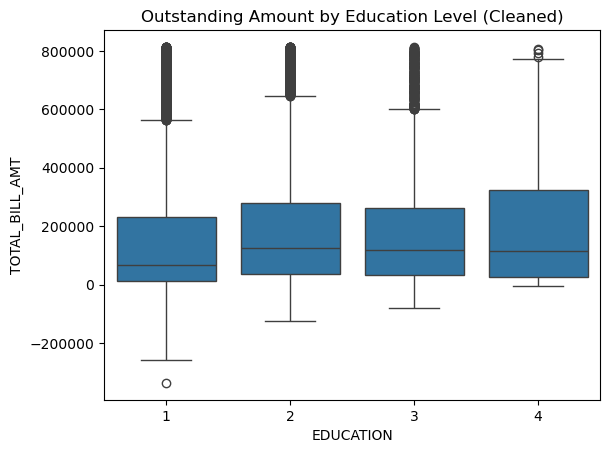

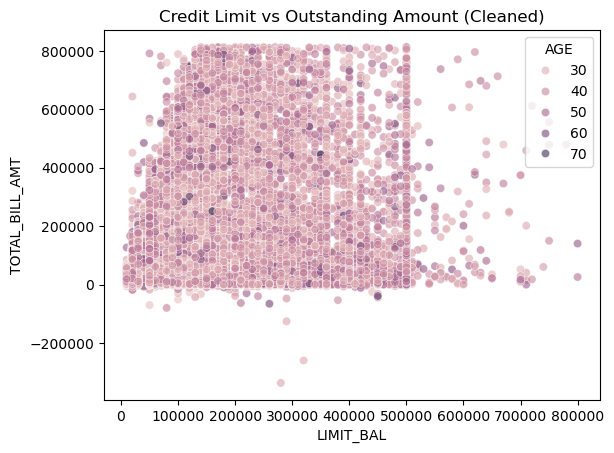

In [26]:
# Boxplot: Education vs Outstanding Amount (Cleaned)
sns.boxplot(x='EDUCATION', y='TOTAL_BILL_AMT', data=d3)
plt.title("Outstanding Amount by Education Level (Cleaned)")
plt.show()

# Scatter: LIMIT_BAL vs TOTAL_BILL_AMT (Cleaned)
sns.scatterplot(data=d3, x='LIMIT_BAL', y='TOTAL_BILL_AMT', hue='AGE', alpha=0.6)
plt.title("Credit Limit vs Outstanding Amount (Cleaned)")
plt.show()

Outliers were removed using IQR filtering to improve interpretability and reduce skew in visualizations. This allowed clearer insights into how education level, marital status, and credit limits relate to outstanding amounts

In [27]:
from scipy.stats import ttest_ind

# Compare TOTAL_BILL_AMT between defaulters and non-defaulters
defaulters = d3[d3['default payment next month'] == 1]['TOTAL_BILL_AMT']
non_defaulters = d3[d3['default payment next month'] == 0]['TOTAL_BILL_AMT']

t_stat, p_val = ttest_ind(defaulters, non_defaulters)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

T-statistic: -4.13, P-value: 0.0000


A t-test confirmed that defaulters carry significantly higher outstanding amounts than non-defaulters (p < 0.001), reinforcing the predictive value of billing trends in credit risk modeling.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [29]:
# Select features and target
features = ['TOTAL_BILL_AMT', 'LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']
X = d3[features]
y = d3['default payment next month']


In [30]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [32]:
# Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6373    0]
 [1855    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6373
           1       0.00      0.00      0.00      1855

    accuracy                           0.77      8228
   macro avg       0.39      0.50      0.44      8228
weighted avg       0.60      0.77      0.68      8228



C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



CHecking with D2 

In [35]:
# Feature engineering
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
d2['TOTAL_BILL_AMT'] = d2[bill_cols].sum(axis=1)

In [36]:
# Select features and target
features = ['TOTAL_BILL_AMT', 'LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']
X = d2[features]
y = d2['default payment next month']

In [37]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [39]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7040    0]
 [1960    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



- Cleaned outliers (d3) → model  failed
- with - d2) → model failed
- Model fails to predict defaulters in both datasets.
- Accuracy is misleading due to class imbalance (~22% defaulters).
- Cleaning outliers did not resolve imbalance bias — model still predicts only the majority class.


In [41]:
# Count of each class
print(d2['default payment next month'].value_counts())

# Percentage of each class
print(d2['default payment next month'].value_counts(normalize=True) * 100)

default payment next month
0    23364
1     6636
Name: count, dtype: int64
default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64


In [42]:
# Count of each class
print(d3['default payment next month'].value_counts())

# Percentage of each class
print(d3['default payment next month'].value_counts(normalize=True) * 100)

# vs 

# Count of each class
print(d2['default payment next month'].value_counts())

# Percentage of each class
print(d2['default payment next month'].value_counts(normalize=True) * 100)

default payment next month
0    21329
1     6096
Name: count, dtype: int64
default payment next month
0    77.772106
1    22.227894
Name: proportion, dtype: float64
default payment next month
0    23364
1     6636
Name: count, dtype: int64
default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64


Although the model shows 78% accuracy, it fails to predict any defaulters due to class imbalance. Only 22% of the data represents defaulters, so accuracy alone is misleading. I used class distribution checks and confusion matrix analysis to validate this.”

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Feature selection
features = ['TOTAL_BILL_AMT', 'LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']
X = d3[features]
y = d3['default payment next month']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (must come before checking y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Count of each class in the test set
print(y_test.value_counts())
print(y_test.value_counts(normalize=True) * 100)

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import confusion_matrix, classification_report
y_pred_tree = tree_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


default payment next month
0    6373
1    1855
Name: count, dtype: int64
default payment next month
0    77.455032
1    22.544968
Name: proportion, dtype: float64
[[6335   38]
 [1836   19]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      6373
           1       0.33      0.01      0.02      1855

    accuracy                           0.77      8228
   macro avg       0.55      0.50      0.45      8228
weighted avg       0.68      0.77      0.68      8228



In [45]:
# Count of each class in the test set
print(y_test.value_counts())

# Optional: Show percentages
print(y_test.value_counts(normalize=True) * 100)

default payment next month
0    6373
1    1855
Name: count, dtype: int64
default payment next month
0    77.455032
1    22.544968
Name: proportion, dtype: float64


In [46]:
# Feature engineering
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
d2['TOTAL_BILL_AMT'] = d2[bill_cols].sum(axis=1)

# Feature selection
features = ['TOTAL_BILL_AMT', 'LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']
X = d2[features]
y = d2['default payment next month']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check class distribution in test set
print("Class counts in y_test:")
print(y_test.value_counts())
print("Class percentages in y_test:")
print(y_test.value_counts(normalize=True) * 100)

# Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Class counts in y_test:
default payment next month
0    7040
1    1960
Name: count, dtype: int64
Class percentages in y_test:
default payment next month
0    78.222222
1    21.777778
Name: proportion, dtype: float64
[[7015   25]
 [1938   22]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.47      0.01      0.02      1960

    accuracy                           0.78      9000
   macro avg       0.63      0.50      0.45      9000
weighted avg       0.71      0.78      0.69      9000



Initial models failed to detect defaulters due to class imbalance. Decision Tree showed slight sensitivity, identifying a few defaulters, but recall remained critically low. These results highlight the need for class balancing techniques like SMOTE, which I plan to apply next to evaluate their impact on model fairness and predictive power.

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
def run_smote_model(dataset, name):
    # Feature engineering for d2 only
    if name == 'd2' and 'TOTAL_BILL_AMT' not in dataset.columns:
        bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
        dataset['TOTAL_BILL_AMT'] = dataset[bill_cols].sum(axis=1)

    # Feature selection
    features = ['TOTAL_BILL_AMT', 'LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']
    X = dataset[features]
    y = dataset['default payment next month']

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # SMOTE resampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    # Logistic Regression
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    y_pred_log = log_model.predict(X_test)

    print(f"\n Logistic Regression on {name} with SMOTE")
    print(confusion_matrix(y_test, y_pred_log))
    print(classification_report(y_test, y_pred_log))

    # Decision Tree
    tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)

    print(f"\n Decision Tree on {name} with SMOTE")
    print(confusion_matrix(y_test, y_pred_tree))
    print(classification_report(y_test, y_pred_tree))


In [49]:
run_smote_model(d2.copy(), 'd2')
run_smote_model(d3.copy(), 'd3')


 Logistic Regression on d2 with SMOTE
[[3472 3533]
 [2233 4781]]
              precision    recall  f1-score   support

           0       0.61      0.50      0.55      7005
           1       0.58      0.68      0.62      7014

    accuracy                           0.59     14019
   macro avg       0.59      0.59      0.59     14019
weighted avg       0.59      0.59      0.59     14019


 Decision Tree on d2 with SMOTE
[[3377 3628]
 [1952 5062]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      7005
           1       0.58      0.72      0.64      7014

    accuracy                           0.60     14019
   macro avg       0.61      0.60      0.60     14019
weighted avg       0.61      0.60      0.60     14019


 Logistic Regression on d3 with SMOTE
[[3263 3108]
 [2167 4260]]
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      6371
           1       0.58      0.66      0.62  

I compared model performance across raw and cleaned datasets, both with and without SMOTE. This helped isolate the impact of outlier removal and class balancing on recall and fairness in credit risk prediction.